In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
d=pd.read_csv("/content/housing_price_prediction.csv.zip")
print(d)


       SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0            2126         4          1        Rural       1969  215355.283618
1            2459         3          2        Rural       1980  195014.221626
2            1860         2          1       Suburb       1970  306891.012076
3            2294         2          1        Urban       1996  206786.787153
4            2130         5          2       Suburb       2001  272436.239065
...           ...       ...        ...          ...        ...            ...
49995        1282         5          3        Rural       1975  100080.865895
49996        2854         2          2       Suburb       1988  374507.656727
49997        2979         5          3       Suburb       1962  384110.555590
49998        2596         5          2        Rural       1984  380512.685957
49999        1572         5          3        Rural       2011  221618.583218

[50000 rows x 6 columns]


In [ ]:
y=d["Price"]
print(y)
d.shape

0        215355.283618
1        195014.221626
2        306891.012076
3        206786.787153
4        272436.239065
             ...      
49995    100080.865895
49996    374507.656727
49997    384110.555590
49998    380512.685957
49999    221618.583218
Name: Price, Length: 50000, dtype: float64


(50000, 6)

In [ ]:
x=d.drop("Price",axis=1)
print(x)
d.shape

       SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt
0            2126         4          1           1.0       1969
1            2459         3          2           1.0       1980
2            1860         2          1           0.0       1970
3            2294         2          1           0.5       1996
4            2130         5          2           0.0       2001
...           ...       ...        ...           ...        ...
49995        1282         5          3           1.0       1975
49996        2854         2          2           0.0       1988
49997        2979         5          3           0.0       1962
49998        2596         5          2           1.0       1984
49999        1572         5          3           1.0       2011

[50000 rows x 5 columns]


(50000, 6)

In [ ]:

d['Neighborhood']=d['Neighborhood'].replace({'Rural':1,'Suburb':0,'Urban':0.5})
print(d)

       SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt          Price
0            2126         4          1           1.0       1969  215355.283618
1            2459         3          2           1.0       1980  195014.221626
2            1860         2          1           0.0       1970  306891.012076
3            2294         2          1           0.5       1996  206786.787153
4            2130         5          2           0.0       2001  272436.239065
...           ...       ...        ...           ...        ...            ...
49995        1282         5          3           1.0       1975  100080.865895
49996        2854         2          2           0.0       1988  374507.656727
49997        2979         5          3           0.0       1962  384110.555590
49998        2596         5          2           1.0       1984  380512.685957
49999        1572         5          3           1.0       2011  221618.583218

[50000 rows x 6 columns]


Text(0.5, 1.0, 'Prices distribution')

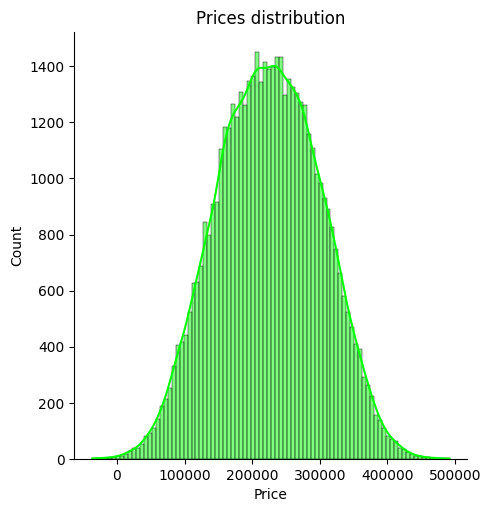

In [ ]:
import seaborn as sns
sns.displot(d.Price, kde = True, color='lime')
plt.title('Prices distribution')

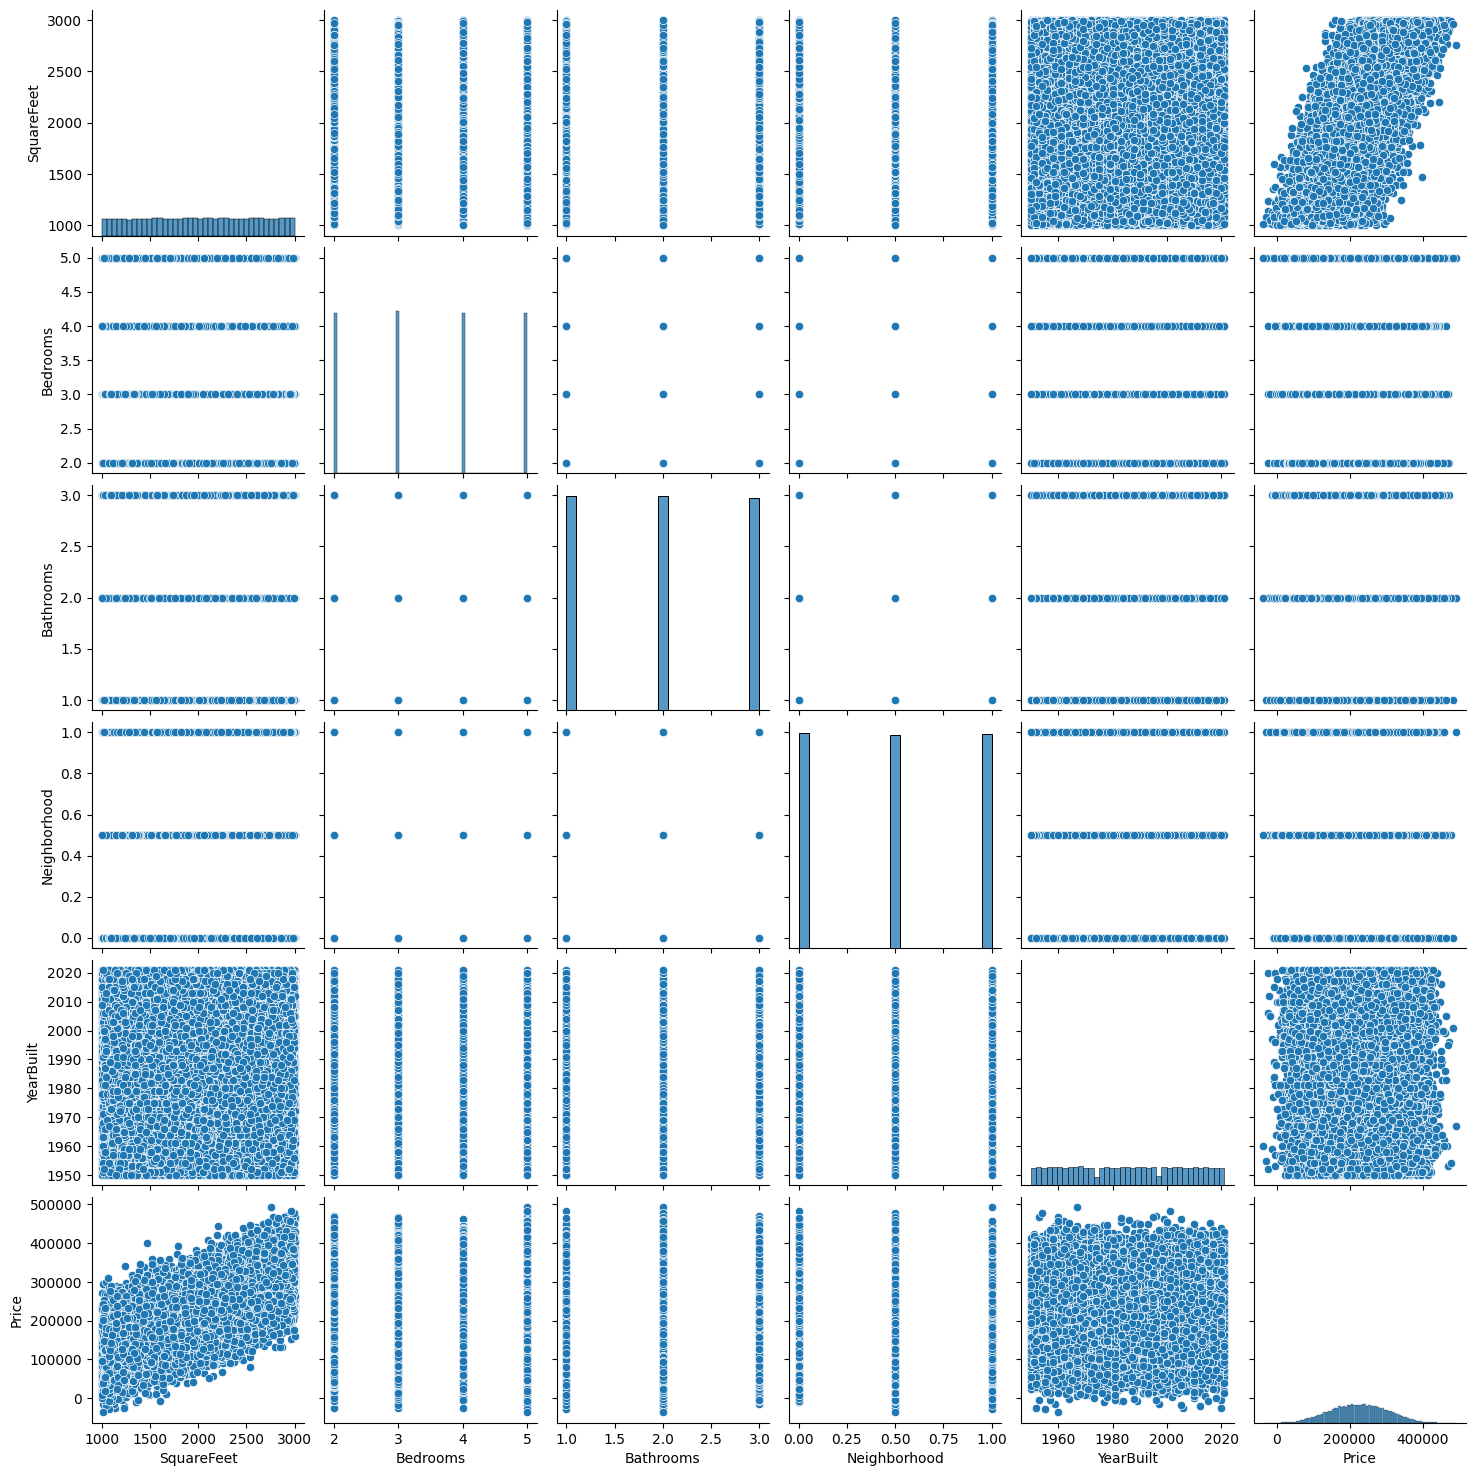

In [ ]:
sns.pairplot(d)

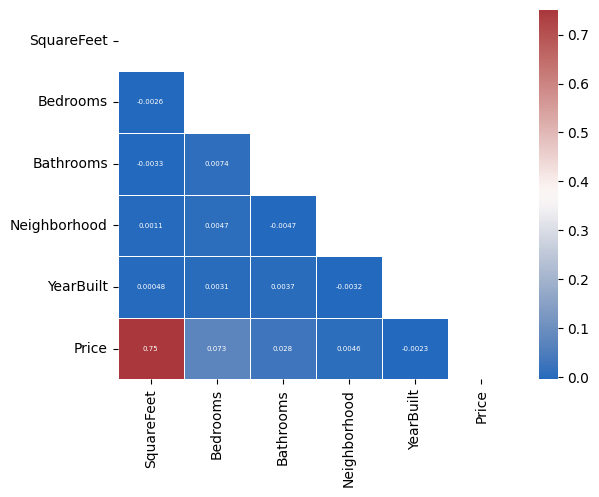

In [ ]:
matrix = np.triu(d.corr())
sns.heatmap(d.corr(), mask=matrix, cmap='vlag',
            linewidths=0.5, linecolor='white',annot=True, annot_kws={'size':5})
plt.show()

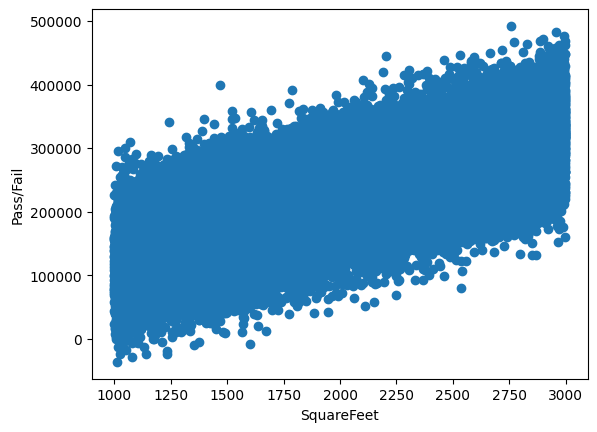

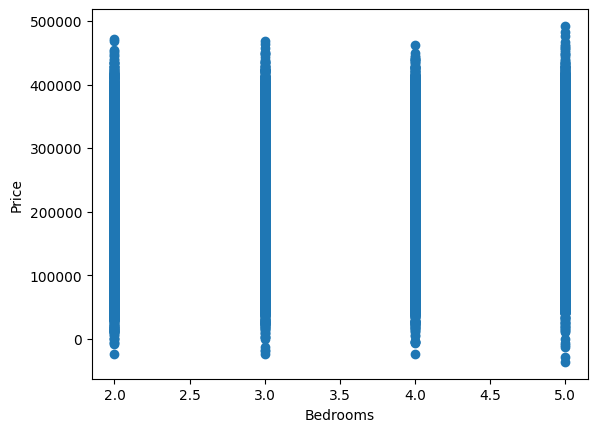

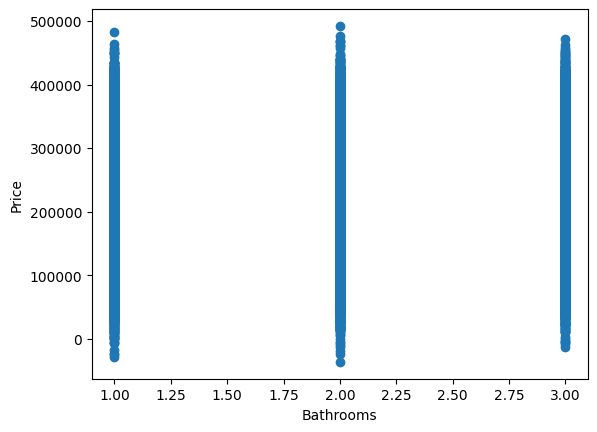

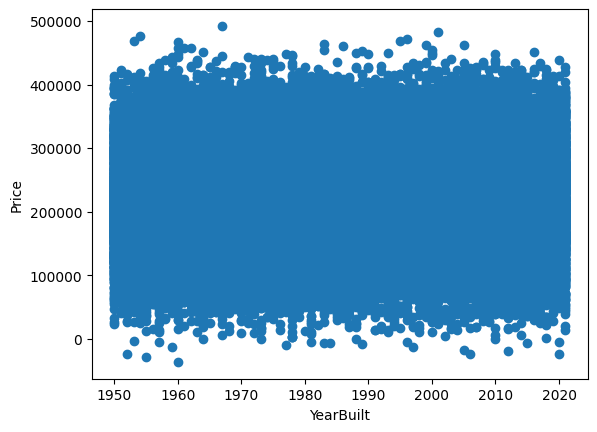

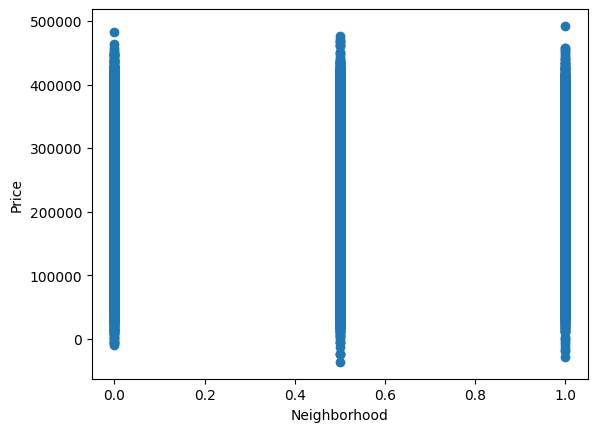

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(d['SquareFeet'],d['Price'])
plt.xlabel("SquareFeet")
plt.ylabel("Pass/Fail")
plt.show()


plt.scatter(d['Bedrooms'],d['Price'])
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()


plt.scatter(d['Bathrooms'],d['Price'])
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()




plt.scatter(d['YearBuilt'],d['Price'])
plt.xlabel("YearBuilt")
plt.ylabel("Price")
plt.show()


plt.scatter(d['Neighborhood'],d['Price'])
plt.xlabel("Neighborhood")
plt.ylabel("Price")
plt.show()



In [ ]:
for column in x.select_dtypes(include=['object']).columns:
    try:
        x[column] = pd.to_numeric(x[column])
    except ValueError:
        print(f"Column '{column}' could not be converted to numeric. It may contain non-numeric values.")
for column in x.select_dtypes(include=['object']).columns:
    try:
        x[column] = pd.to_numeric(x[column], errors='coerce')
    except ValueError:
        print(f"Column '{column}' could not be converted to numeric. It may contain non-numeric values.")

x = x.fillna(0)

dd = (x - x.min()) / (x.max() - x.min())

print(dd)

       SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt
0        0.563282  0.666667        0.0           1.0   0.267606
1        0.729865  0.333333        0.5           1.0   0.422535
2        0.430215  0.000000        0.0           0.0   0.281690
3        0.647324  0.000000        0.0           0.5   0.647887
4        0.565283  1.000000        0.5           0.0   0.718310
...           ...       ...        ...           ...        ...
49995    0.141071  1.000000        1.0           1.0   0.352113
49996    0.927464  0.000000        0.5           0.0   0.535211
49997    0.989995  1.000000        1.0           0.0   0.169014
49998    0.798399  1.000000        0.5           1.0   0.478873
49999    0.286143  1.000000        1.0           1.0   0.859155

[50000 rows x 5 columns]


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(d, test_size = 0.2)

In [ ]:
x_train = train.iloc[:, :20].values
x_test = test.iloc[:, :20].values

In [ ]:
y_train = train['Price'].values
y_test = test['Price'].values

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
 from sklearn.linear_model import LinearRegression
 model_lr = LinearRegression()
 model_lr.fit(x_train, y_train)
 y_train_predict = model_lr.predict(x_train)
 y_test_predict = model_lr.predict(x_test)
 print(f'train data MSE score: {mean_squared_error(y_train, y_train_predict)}')
 print(f'train data MAE score: {mean_absolute_error(y_train, y_train_predict)}')
 print(f'train data RMSE score: {root_mean_squared_error(y_train, y_train_predict)}')
 print()
 print(f'test data MSE score: {mean_squared_error(y_test, y_test_predict)}')
 print(f'test data MAE score: {mean_absolute_error(y_test, y_test_predict)}')
 print(f'test data RMSE score: {root_mean_squared_error(y_test, y_test_predict)}')

train data MSE score: 2.4095791987808494e-22
train data MAE score: 8.56831547935144e-12
train data RMSE score: 1.5522819327624893e-11

test data MSE score: 2.347520616327738e-22
test data MAE score: 8.370312798433589e-12
test data RMSE score: 1.5321620724739722e-11


In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

def bootstrap_metrics(model, x_train, y_train, x_test, y_test, n_iterations=10):
    mse_values = []
    mae_values = []
    rmse_values = []
    for _ in range(n_iterations):
        x_train_resampled, y_train_resampled = resample(x_train, y_train)
        model.fit(x_train_resampled, y_train_resampled)
        y_pred = model.predict(x_test)
        mse_values.append(mean_squared_error(y_test, y_pred))
        mae_values.append(mean_absolute_error(y_test, y_pred))
        rmse_values.append(root_mean_squared_error(y_test, y_pred))
    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)

mse_lr, mae_lr, rmse_lr = bootstrap_metrics(model_lr, x_train, y_train, x_test, y_test)


print(f"Bootstrapped MSE for Linear Regression: {mse_lr.mean()}")
print(f"Confidence intervals for Linear Regression MSE: {np.percentile(mse_lr, [2.5, 97.5])}")
print(f"Bootstrapped MAE for Linear Regression: {mae_lr.mean()}")
print(f"Confidence intervals for Linear Regression MAE: {np.percentile(mae_lr, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for Linear Regression: {rmse_lr.mean()}")
print(f"Confidence intervals for Linear Regression RMSE: {np.percentile(rmse_lr, [2.5, 97.5])}")

Bootstrapped MSE for Linear Regression: 2.9529840143971276e-18
Confidence intervals for Linear Regression MSE: [6.99148641e-20 1.04627656e-17]
Bootstrapped MAE for Linear Regression: 1.3495269007535171e-09
Confidence intervals for Linear Regression MAE: [2.44802465e-10 3.23423630e-09]
Bootstrapped RMSE for Linear Regression: 1.351274342996182e-09
Confidence intervals for Linear Regression RMSE: [2.51732318e-10 3.23437222e-09]


In [ ]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(x_train, y_train)

SVR()

In [ ]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(x_train, y_train)
y_pred_train = model_svr.predict(x_train)
y_pred_test= model_svr.predict(x_test)

print(f'train data MSE score SVR: {mean_squared_error(y_train,y_pred_train )}')
print(f'train data MAE score SVR: {mean_absolute_error(y_train, y_pred_train)}')
print(f'train data RMSE score SVR: {root_mean_squared_error(y_train,y_pred_train )}')



print()
print(f'test data MSE score SVR: {mean_squared_error(y_test, y_pred_test)}')
print(f'test data MAE score SVR: {mean_absolute_error(y_test, y_pred_test)}')
print(f'test data RMSE score SVR: {root_mean_squared_error(y_test, y_pred_test)}')
print()


train data MSE score SVR: 5040445339.239277
train data MAE score SVR: 57659.858492719555
train data RMSE score SVR: 70996.09383085296

test data MSE score SVR: 5150034236.958839
test data MAE score SVR: 58256.97727033979
test data RMSE score SVR: 71763.7390118355



In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

def bootstrap_metrics_svr(model, x_train, y_train, x_test, y_test, n_iterations=10):
    mse_values = []
    mae_values = []
    rmse_values = []
    for _ in range(n_iterations):

        x_train_resampled, y_train_resampled = resample(x_train, y_train)

        model.fit(x_train_resampled, y_train_resampled)

        y_pred = model.predict(x_test)

        mse_values.append(mean_squared_error(y_test, y_pred))
        mae_values.append(mean_absolute_error(y_test, y_pred))
        rmse_values.append(root_mean_squared_error(y_test, y_pred))
    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)


mse_svr, mae_svr, rmse_svr = bootstrap_metrics_svr(model_svr, x_train, y_train, x_test, y_test)

print(f"Bootstrapped MSE for SVR: {mse_svr.mean()}")
print(f"Confidence intervals for SVR MSE: {np.percentile(mse_svr, [2.5, 97.5])}")
print(f"Bootstrapped MAE for SVR: {mae_svr.mean()}")
print(f"Confidence intervals for SVR MAE: {np.percentile(mae_svr, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for SVR: {rmse_svr.mean()}")
print(f"Confidence intervals for SVR RMSE: {np.percentile(rmse_svr, [2.5, 97.5])}")

Bootstrapped MSE for SVR: 5148984560.984781
Confidence intervals for SVR MSE: [5.1454561e+09 5.1527204e+09]
Bootstrapped MAE for SVR: 58250.592415784624
Confidence intervals for SVR MAE: [58229.8732252 58272.5784138]
Bootstrapped RMSE for SVR: 71756.42307582666
Confidence intervals for SVR RMSE: [71731.83465393 71782.45191584]


In [ ]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)

Lasso()

In [ ]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)


y_pred_lasso = model_lasso.predict(x_test)
y_pred_ridge = model_ridge.predict(x_test)

y_pred_lasso1 = model_lasso.predict(x_train)
y_pred_ridge1 = model_ridge.predict(x_train)

print(f'test data MSE score lasso: {mean_squared_error(y_test,y_pred_lasso)}')
print(f'test data MAE score lasso: {mean_absolute_error(y_test, y_pred_lasso)}')
print(f'test data RMSE score lasso: {root_mean_squared_error(y_test, y_pred_lasso)}')
print()
print(f'train data MSE score lasso: {mean_squared_error(y_train,y_pred_lasso1)}')
print(f'train data MAE score lasso: {mean_absolute_error(y_train,y_pred_lasso1 )}')
print(f'train data RMSE score lasso: {root_mean_squared_error(y_train,y_pred_lasso1)}')
print()






test data MSE score lasso: 0.0016269868922024159
test data MAE score lasso: 0.032601664365441214
test data RMSE score lasso: 0.040335925577609046

train data MSE score lasso: 0.0016618467668136564
train data MAE score lasso: 0.03289741769111543
train data RMSE score lasso: 0.04076575482943565



In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

def bootstrap_metrics_svr(model, x_train, y_train, x_test, y_test, n_iterations=10):
    mse_values = []
    mae_values = []
    rmse_values = []
    for _ in range(n_iterations):

        x_train_resampled, y_train_resampled = resample(x_train, y_train)

        model.fit(x_train_resampled, y_train_resampled)

        y_pred = model.predict(x_test)

        mse_values.append(mean_squared_error(y_test, y_pred))
        mae_values.append(mean_absolute_error(y_test, y_pred))
        rmse_values.append(root_mean_squared_error(y_test, y_pred))
    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)


mse_svr, mae_svr, rmse_svr = bootstrap_metrics_svr(model_svr, x_train, y_train, x_test, y_test)

print(f"Bootstrapped MSE for SVR: {mse_svr.mean()}")
print(f"Confidence intervals for SVR MSE: {np.percentile(mse_svr, [2.5, 97.5])}")
print(f"Bootstrapped MAE for SVR: {mae_svr.mean()}")
print(f"Confidence intervals for SVR MAE: {np.percentile(mae_svr, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for SVR: {rmse_svr.mean()}")
print(f"Confidence intervals for SVR RMSE: {np.percentile(rmse_svr, [2.5, 97.5])}")

Bootstrapped MSE for Lasso Regression: 0.001351660904723772
Confidence intervals for Lasso Regression MSE: [0.00082328 0.00174333]
Bootstrapped MAE for Lasso Regression: 0.029491117648920834
Confidence intervals for Lasso Regression MAE: [0.02316394 0.03375194]
Bootstrapped RMSE for Lasso Regression: 0.03648346704655983
Confidence intervals for Lasso Regression RMSE: [0.02866222 0.04175165]


In [ ]:
from sklearn.linear_model import Lasso, Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)

Ridge()

In [ ]:
print(f'train data MSE score ridge: {mean_squared_error(y_train,y_pred_ridge1)}')
print(f'train data MAE score ridge: {mean_absolute_error(y_train,y_pred_ridge1 )}')
print(f'train data RMSE score ridge: {root_mean_squared_error(y_train,y_pred_ridge1)}')
print()
print(f'test data MSE score ridge: {mean_squared_error(y_test,y_pred_ridge)}')
print(f'test data MAE score ridge: {mean_absolute_error(y_test,y_pred_ridge )}')
print(f'test data RMSE score ridge: {root_mean_squared_error(y_test,y_pred_ridge)}')
print()

train data MSE score ridge: 2.0711582897676858e-19
train data MAE score ridge: 3.6357752506432915e-10
train data RMSE score ridge: 4.550998011170391e-10

test data MSE score ridge: 2.059814265614984e-19
test data MAE score ridge: 3.619056087700301e-10
test data RMSE score ridge: 4.538517671679801e-10



In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

def bootstrap_metrics_svr(model, x_train, y_train, x_test, y_test, n_iterations=10):
    mse_values = []
    mae_values = []
    rmse_values = []
    for _ in range(n_iterations):

        x_train_resampled, y_train_resampled = resample(x_train, y_train)

        model.fit(x_train_resampled, y_train_resampled)

        y_pred = model.predict(x_test)

        mse_values.append(mean_squared_error(y_test, y_pred))
        mae_values.append(mean_absolute_error(y_test, y_pred))
        rmse_values.append(root_mean_squared_error(y_test, y_pred))
    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)


mse_svr, mae_svr, rmse_svr = bootstrap_metrics_svr(model_svr, x_train, y_train, x_test, y_test)

print(f"Bootstrapped MSE for SVR: {mse_svr.mean()}")
print(f"Confidence intervals for SVR MSE: {np.percentile(mse_svr, [2.5, 97.5])}")
print(f"Bootstrapped MAE for SVR: {mae_svr.mean()}")
print(f"Confidence intervals for SVR MAE: {np.percentile(mae_svr, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for SVR: {rmse_svr.mean()}")
print(f"Confidence intervals for SVR RMSE: {np.percentile(rmse_svr, [2.5, 97.5])}")

Bootstrapped MSE for Ridge Regression: 5.041938127474921e-18
Confidence intervals for Ridge Regression MSE: [5.25043047e-19 1.32566883e-17]
Bootstrapped MAE for Ridge Regression: 1.7430621988978603e-09
Confidence intervals for Ridge Regression MAE: [6.20434599e-10 3.37123575e-09]
Bootstrapped RMSE for Ridge Regression: 1.9455309644500457e-09
Confidence intervals for Ridge Regression RMSE: [7.17906997e-10 3.63914748e-09]


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error

y_pred_knn = model_knn.predict(x_test)
y_pred_knn1 = model_knn.predict(x_train)

mse = mean_squared_error(y_test, y_pred_knn)
mae = mean_absolute_error(y_test, y_pred_knn)
rmse = root_mean_squared_error(y_test, y_pred_knn)

mse1=mean_squared_error(y_train, y_pred_knn1)
mae1=mean_absolute_error(y_train, y_pred_knn1)
rmse1=root_mean_squared_error(y_train, y_pred_knn1)


print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print()
print(f"Mean Squared Error: {mse1}")
print(f"Mean Absolute Error: {mae1}")
print(f"Root Mean Squared Error: {rmse1}")


Mean Squared Error: 8908.09948366459
Mean Absolute Error: 28.96430396333242
Root Mean Squared Error: 94.38272873605949

Mean Squared Error: 11000.708501048832
Mean Absolute Error: 23.380839817439703
Root Mean Squared Error: 104.88426240885155


In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [ ]:
def bootstrap_metrics_knn(model, x_train, y_train, x_test, y_test, n_iterations=10):
    mse_values = []
    mae_values = []
    rmse_values = []
    for _ in range(n_iterations):

        x_train_resampled, y_train_resampled = resample(x_train, y_train)

        model.fit(x_train_resampled, y_train_resampled)

        y_pred = model.predict(x_test)

        mse_values.append(mean_squared_error(y_test, y_pred))
        mae_values.append(mean_absolute_error(y_test, y_pred))
        rmse_values.append(root_mean_squared_error(y_test, y_pred))

    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)

In [ ]:
mse_knn, mae_knn, rmse_knn = bootstrap_metrics_knn(model_knn, x_train, y_train, x_test, y_test)

print(f"Bootstrapped MSE for KNN Regression: {mse_knn.mean()}")
print(f"Confidence intervals for KNN Regression MSE: {np.percentile(mse_knn, [2.5, 97.5])}")
print(f"Bootstrapped MAE for KNN Regression: {mae_knn.mean()}")
print(f"Confidence intervals for KNN Regression MAE: {np.percentile(mae_knn, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for KNN Regression: {rmse_knn.mean()}")
print(f"Confidence intervals for KNN Regression RMSE: {np.percentile(rmse_knn, [2.5, 97.5])}")

Bootstrapped MSE for KNN Regression: 21194.47251621798
Confidence intervals for KNN Regression MSE: [ 8327.51323084 41187.38462174]
Bootstrapped MAE for KNN Regression: 41.264447478782735
Confidence intervals for KNN Regression MAE: [39.81714977 43.25735153]
Bootstrapped RMSE for KNN Regression: 141.46513355398068
Confidence intervals for KNN Regression RMSE: [ 90.66548398 202.58821263]


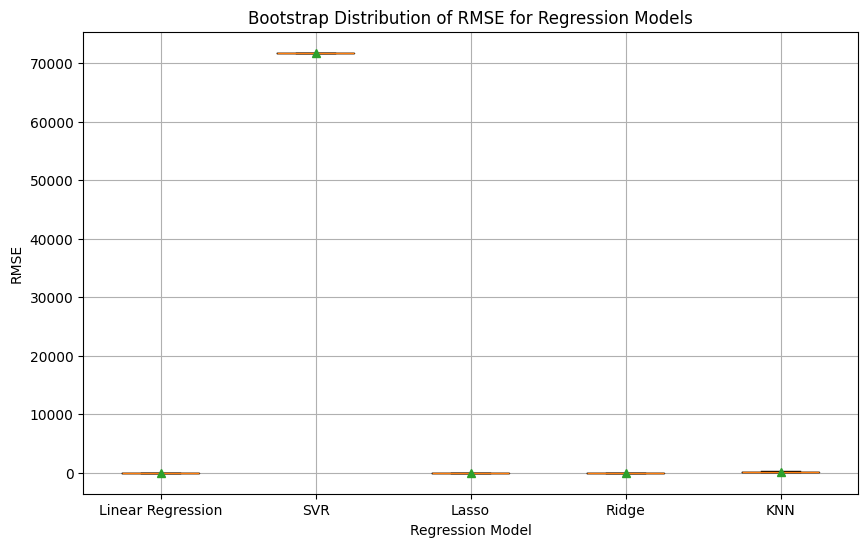

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


data = [rmse_lr, rmse_svr, rmse_lasso, rmse_ridge, rmse_knn]
labels = ["Linear Regression", "SVR", "Lasso", "Ridge", "KNN"]

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, showmeans=True)
plt.title("Bootstrap Distribution of RMSE for Regression Models")
plt.ylabel("RMSE")
plt.xlabel("Regression Model")
plt.grid(True)
plt.show()

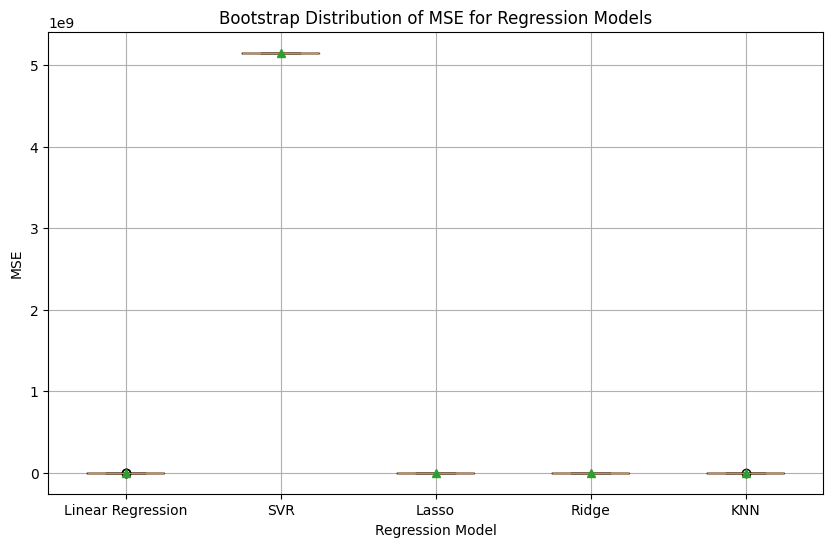

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [mse_lr, mse_svr, mse_lasso, mse_ridge, mse_knn]
labels = ["Linear Regression", "SVR", "Lasso", "Ridge", "KNN"]

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, showmeans=True)
plt.title("Bootstrap Distribution of MSE for Regression Models")
plt.ylabel("MSE")
plt.xlabel("Regression Model")
plt.grid(True)
plt.show()

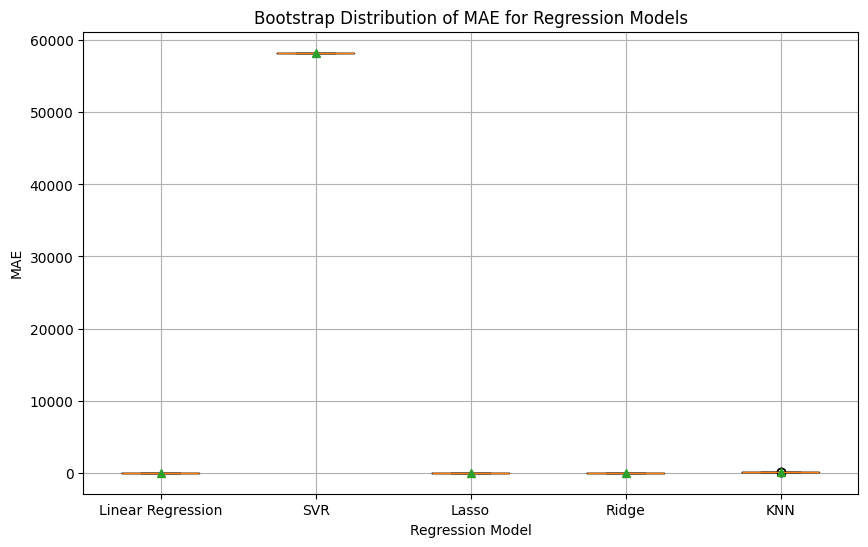

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [mae_lr, mae_svr, mae_lasso, mae_ridge, mae_knn]
labels = ["Linear Regression", "SVR", "Lasso", "Ridge", "KNN"]

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, showmeans=True)
plt.title("Bootstrap Distribution of MAE for Regression Models")
plt.ylabel("MAE")
plt.xlabel("Regression Model")
plt.grid(True)
plt.show()